# Validate the network
#### Various plots to check the detailed performance of the algorithm

## Setup

In [1]:
import numpy as np
seed = 7
np.random.seed(seed)
import pandas as pd
from keras.models import load_model
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from utils import profile_data
from utils import plot_mean_std

Using TensorFlow backend.


In [2]:
radius = 'ak5' # Jet radius to use. Either 'ak5' or 'ak7'

#### Load data and model

In [3]:
df_jets_train = pd.read_pickle('data/{}/df_jets_{}_train.pkl'.format(radius, radius))
df_jets_val = pd.read_pickle('data/{}/df_jets_{}_val.pkl'.format(radius, radius))

In [4]:
model = load_model('models/{}/cnn_pteta_epoch10_valloss0.0092.h5'.format(radius))

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:1253: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


#### Stack the jet images into the proper input format

In [5]:
jet_images_train = np.stack(df_jets_train['jet_images'])
jet_images_val = np.stack(df_jets_val['jet_images'])

#### Make predictions

In [6]:
true_train = df_jets_train['jet_resp']
pred_train = model.predict([jet_images_train, df_jets_train[['scaled_pt', 'jet_eta']].values])

true_val = df_jets_val['jet_resp']
pred_val = model.predict([jet_images_val, df_jets_val[['scaled_pt', 'jet_eta']].values])

#### Calculate metrics

In [7]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(true_train, pred_train)
mse_val = mean_squared_error(true_val, pred_val)

residual_train = (true_train - pred_train[:,0])/true_train
residual_val = (true_val - pred_val[:,0])/true_val

#### Unscale variables

In [8]:
df_jets_train['jet_eta'] *= 5.0
df_jets_val['jet_eta'] *= 5.0

##### Check unscaled variables

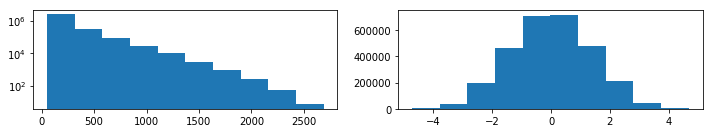

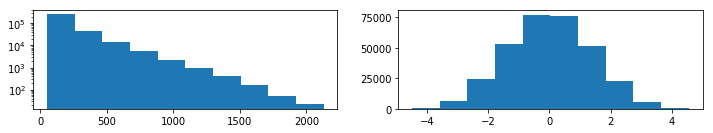

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(2,2,1)
plt.hist(df_jets_train['jet_pt'])
plt.yscale('log')
plt.subplot(2,2,2)
plt.hist(df_jets_train['jet_eta'])
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(2,2,3)
plt.hist(df_jets_val['jet_pt'])
plt.yscale('log')
plt.subplot(2,2,4)
plt.hist(df_jets_val['jet_eta'])
plt.show()

## Plots

In [10]:
target_var = "Jet Response"

#### Prediction vs Target

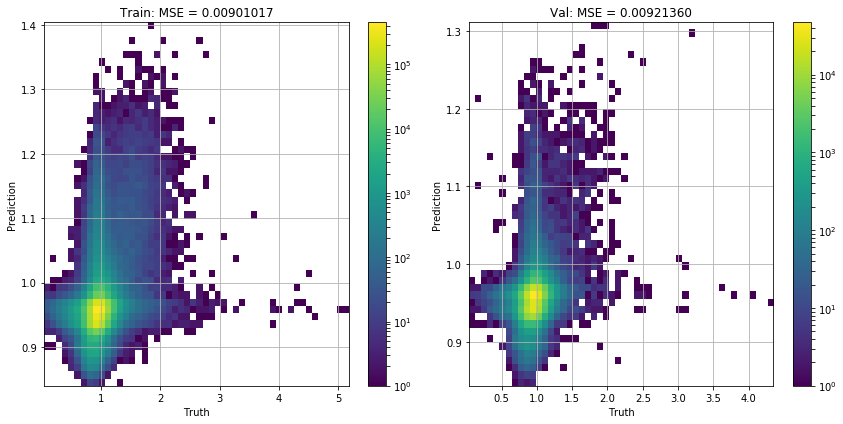

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist2d(true_train, pred_train[:,0], bins=50, norm=LogNorm())
plt.title('Train: MSE = {:.8f}'.format(mse_train))
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.colorbar()

plt.subplot(1,2,2)
plt.grid()
plt.hist2d(true_val, pred_val[:,0], bins=50, norm=LogNorm())
plt.title('Val: MSE = {:.8f}'.format(mse_val))
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.colorbar()

plt.tight_layout()
plt.show()

utils.py:16: RuntimeWarning: Mean of empty slice.
  means.append(bin_entries.mean())
/usr/lib64/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/lib64/python2.7/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib64/python2.7/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib64/python2.7/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/lib64/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


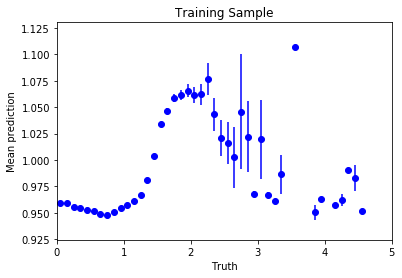

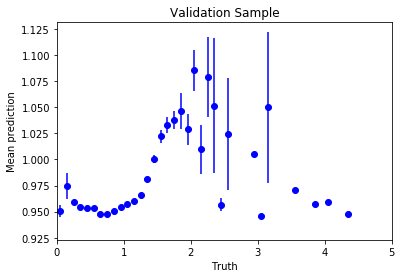

In [12]:
profile_data(true_train, [pred_train], 50, 0, 5, ['b'], plabels=[''], title='Training Sample', xlabel='Truth', ylabel='Mean prediction')
profile_data(true_val, [pred_val], 50, 0, 5, ['b'], plabels=[''], title='Validation Sample', xlabel='Truth',  ylabel='Mean prediction')

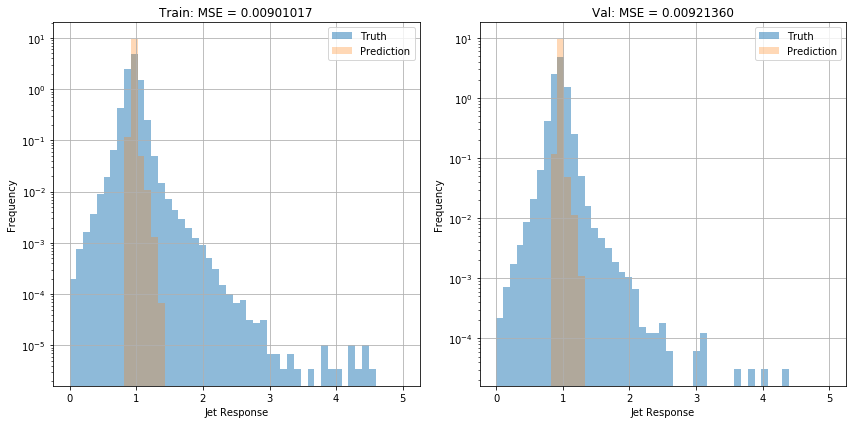

In [13]:
bins = np.linspace(0,5,50)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(true_train, bins, label='Truth', alpha=0.5, normed=True)
plt.hist(pred_train, bins, label='Prediction', alpha=0.3, normed=True)
plt.xlabel(target_var)
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Train: MSE = {:.8f}'.format(mse_train))
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.hist(true_val, bins, label='Truth', alpha=0.5, normed=True)
plt.hist(pred_val, bins, label='Prediction', alpha=0.3, normed=True)
plt.xlabel(target_var)
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Val: MSE = {:.8f}'.format(mse_val))
plt.legend()

plt.tight_layout()
plt.show()

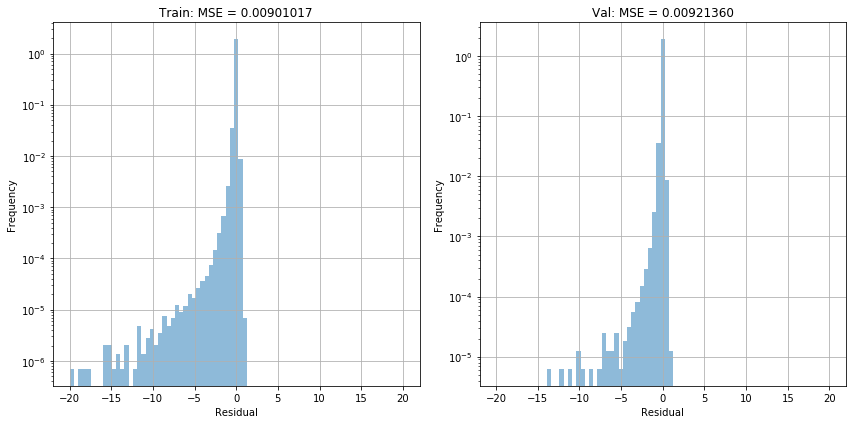

In [14]:
bins = np.linspace(-20, 20, 80)
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(residual_train, bins, alpha=0.5, normed=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Train: MSE = {:.8f}'.format(mse_train))

plt.subplot(1,2,2)
plt.grid()
plt.hist(residual_val, bins, alpha=0.5, normed=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Val: MSE = {:.8f}'.format(mse_val))

plt.tight_layout()
plt.show()

#### Target as a function of pT

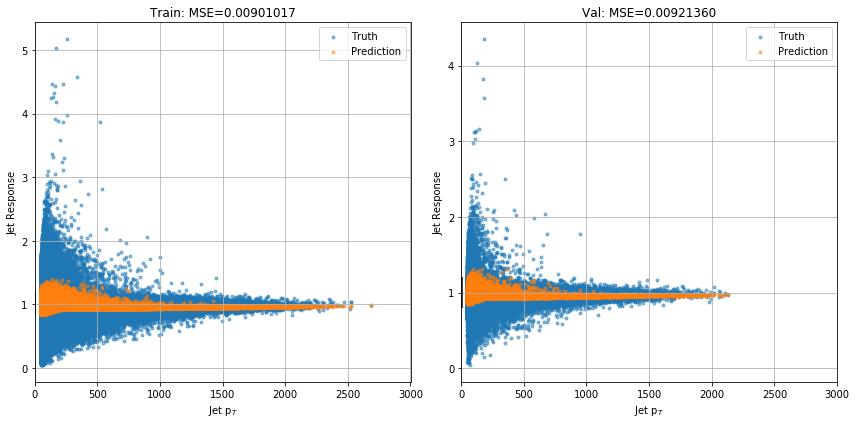

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Train: MSE={:.8f}'.format(mse_train))
plt.scatter(df_jets_train['jet_pt'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['jet_pt'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,3000))
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Jet p$_{T}$')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Val: MSE={:.8f}'.format(mse_val))
plt.scatter(df_jets_val['jet_pt'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['jet_pt'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,3000))
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Jet p$_{T}$')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

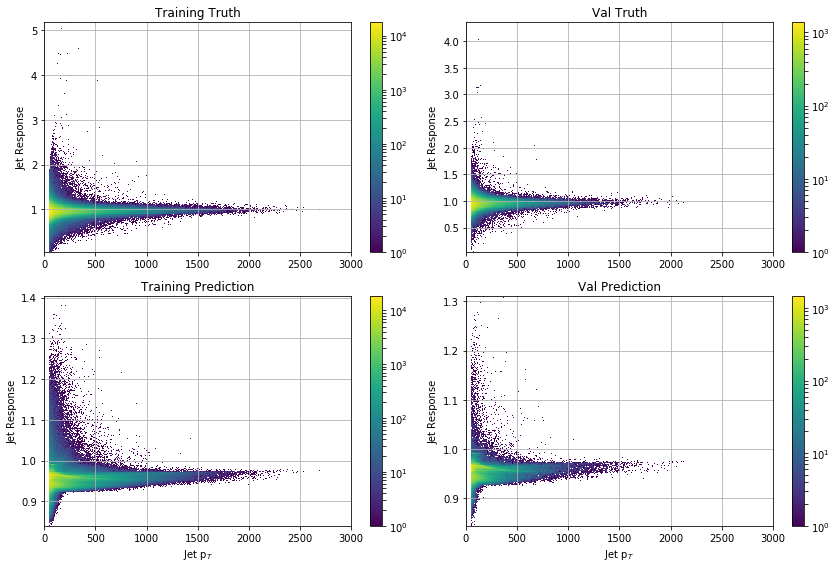

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.title('Training Truth')
plt.hist2d(df_jets_train['jet_pt'], true_train, bins=300, norm=LogNorm())
plt.xlim((0,3000))
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,3)
plt.grid()
plt.title('Training Prediction')
plt.hist2d(df_jets_train['jet_pt'], pred_train[:,0], bins=300, norm=LogNorm())
plt.xlim((0,3000))
plt.xlabel('Jet p$_{T}$')
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,2)
plt.grid()
plt.title('Val Truth')
plt.hist2d(df_jets_val['jet_pt'], true_val, bins=300, norm=LogNorm())
plt.xlim((0,3000))
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,4)
plt.grid()
plt.title('Val Prediction')
plt.hist2d(df_jets_val['jet_pt'], pred_val[:,0], bins=300, norm=LogNorm())
plt.xlim((0,3000))
plt.xlabel('Jet p$_{T}$')
plt.ylabel(target_var)
plt.colorbar()

plt.tight_layout()
plt.show()

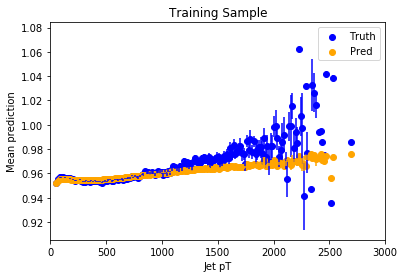

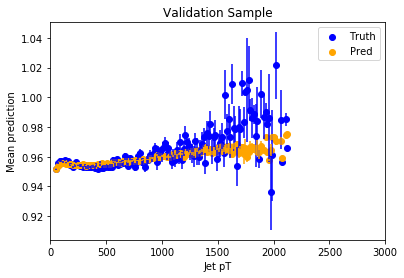

In [17]:
profile_data(df_jets_train['jet_pt'], [true_train, pred_train], 200, 0, 3000, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Jet pT', ylabel='Mean prediction')
profile_data(df_jets_val['jet_pt'], [true_val, pred_val], 200, 0, 3000, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Jet pT', ylabel='Mean prediction')

utils.py:41: RuntimeWarning: Mean of empty slice.
  means.append(bin_entries.mean())


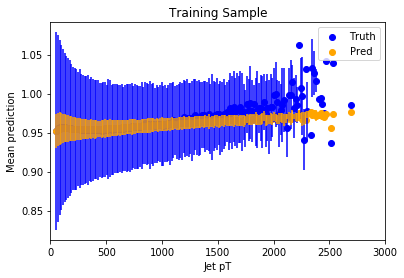

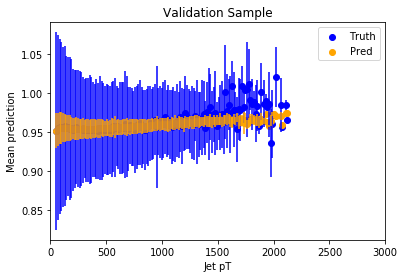

In [18]:
plot_mean_std(df_jets_train['jet_pt'], [true_train, pred_train], 200, 0, 3000, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Jet pT', ylabel='Mean prediction')
plot_mean_std(df_jets_val['jet_pt'], [true_val, pred_val], 200, 0, 3000, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Jet pT', ylabel='Mean prediction')

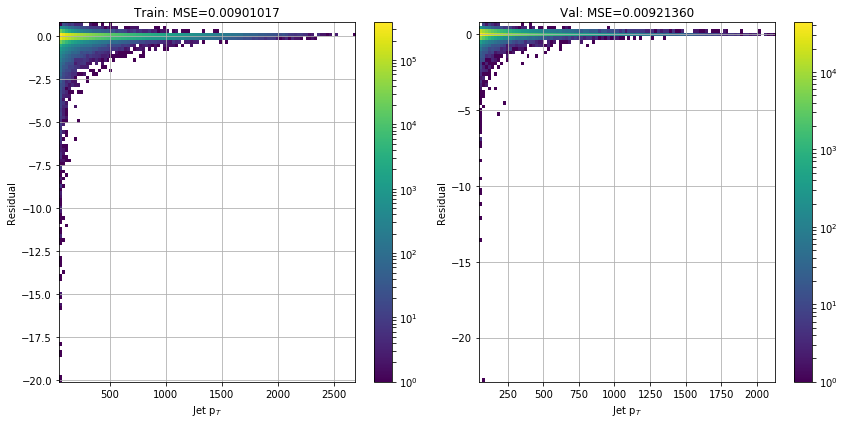

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Train: MSE={:.8f}'.format(mse_train))
plt.hist2d(df_jets_train['jet_pt'], residual_train, bins=100, norm=LogNorm())
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet p$_{T}$')
plt.ylabel('Residual')
plt.legend()
plt.colorbar()

plt.subplot(1,2,2)
plt.grid()
plt.title('Val: MSE={:.8f}'.format(mse_val))
plt.hist2d(df_jets_val['jet_pt'], residual_val, bins=100, norm=LogNorm())
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet p$_{T}$')
plt.ylabel('Residual')
plt.legend()
plt.colorbar()

plt.tight_layout()
plt.show()

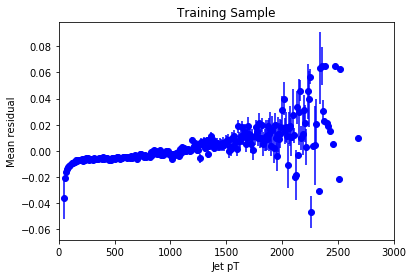

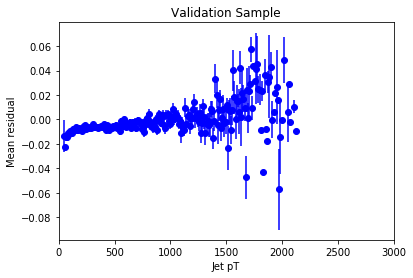

In [20]:
profile_data(df_jets_train['jet_pt'], [residual_train], 300, 0, 3000, ['b'], plabels=[''], title='Training Sample', xlabel='Jet pT', ylabel='Mean residual')
profile_data(df_jets_val['jet_pt'], [residual_val], 300, 0, 3000, ['b'], plabels=[''], title='Validation Sample', xlabel='Jet pT', ylabel='Mean residual')

#### Target as a function of eta

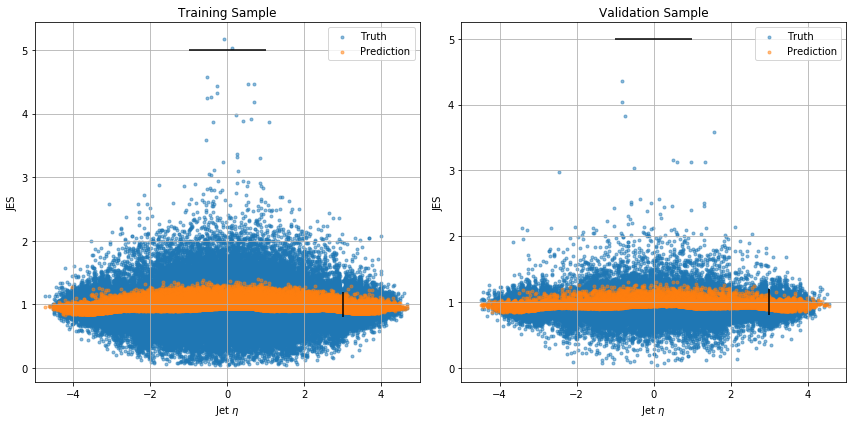

In [21]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['jet_eta'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['jet_eta'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-5.,5.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Jet $\eta$')
plt.ylabel('JES')
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['jet_eta'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['jet_eta'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-5.,5.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Jet $\eta$')
plt.ylabel('JES')
plt.legend()

plt.tight_layout()
plt.show()

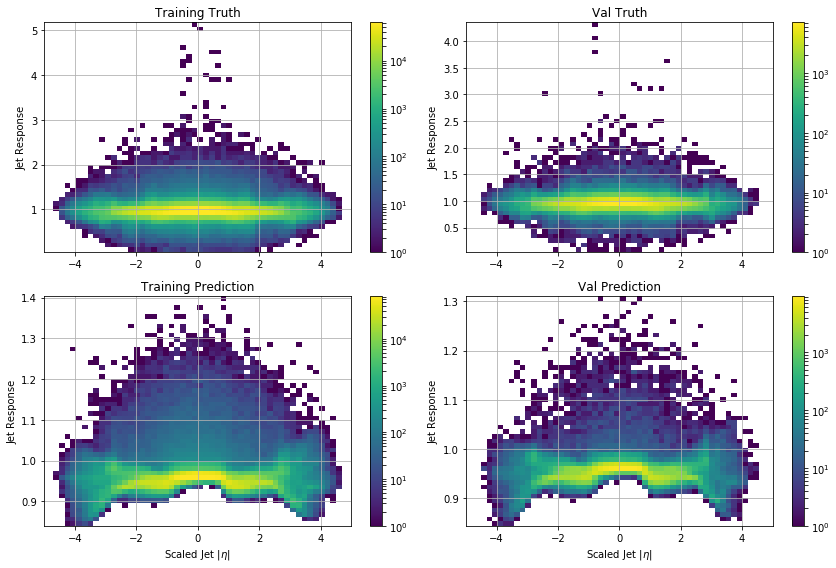

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.grid()
plt.title('Training Truth')
plt.hist2d(df_jets_train['jet_eta'], true_train, bins=50, norm=LogNorm())
plt.xlim((-5.,5.))
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,3)
plt.grid()
plt.title('Training Prediction')
plt.hist2d(df_jets_train['jet_eta'], pred_train[:,0], bins=50, norm=LogNorm())
plt.xlim((-5.,5.))
plt.xlabel(r'Scaled Jet |$\eta$|')
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,2)
plt.grid()
plt.title('Val Truth')
plt.hist2d(df_jets_val['jet_eta'], true_val, bins=50, norm=LogNorm())
plt.xlim((-5.,5.))
plt.ylabel(target_var)
plt.colorbar()

plt.subplot(2,2,4)
plt.grid()
plt.title('Val Prediction')
plt.hist2d(df_jets_val['jet_eta'], pred_val[:,0], bins=50, norm=LogNorm())
plt.xlim((-5.,5.))
plt.xlabel(r'Scaled Jet |$\eta$|')
plt.ylabel(target_var)
plt.colorbar()

plt.tight_layout()
plt.show()

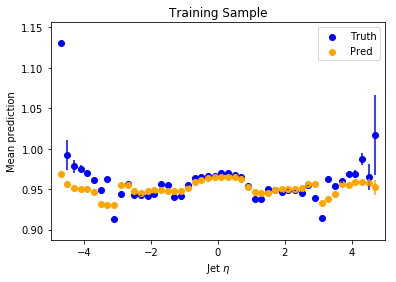

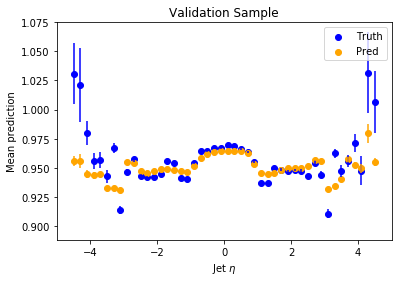

In [23]:
profile_data(df_jets_train['jet_eta'], [true_train, pred_train], 50, -5, 5, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Jet $\eta$', ylabel='Mean prediction')
profile_data(df_jets_val['jet_eta'], [true_val, pred_val], 50, -5, 5, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Jet $\eta$', ylabel='Mean prediction')

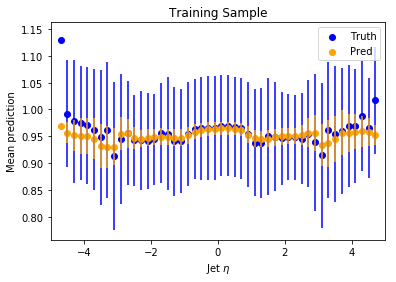

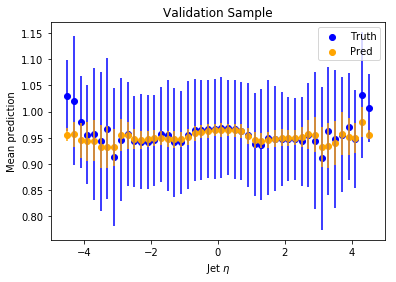

In [24]:
plot_mean_std(df_jets_train['jet_eta'], [true_train, pred_train], 50, -5, 5, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Jet $\eta$', ylabel='Mean prediction')
plot_mean_std(df_jets_val['jet_eta'], [true_val, pred_val], 50, -5, 5, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Jet $\eta$', ylabel='Mean prediction')

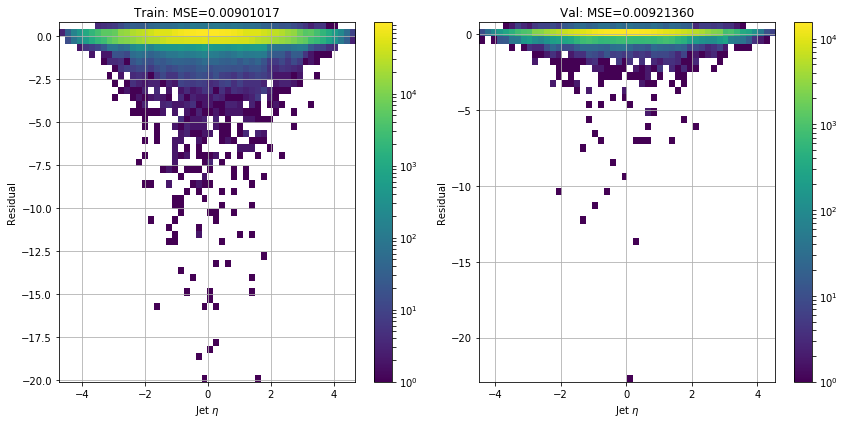

In [25]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Train: MSE={:.8f}'.format(mse_train))
plt.hist2d(df_jets_train['jet_eta'], residual_train, bins=50, norm=LogNorm())
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet $\eta$')
plt.ylabel('Residual')
plt.legend()
plt.colorbar()

plt.subplot(1,2,2)
plt.grid()
plt.title('Val: MSE={:.8f}'.format(mse_val))
plt.hist2d(df_jets_val['jet_eta'], residual_val, bins=50, norm=LogNorm())
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet $\eta$')
plt.ylabel('Residual')
plt.legend()
plt.colorbar()

plt.tight_layout()
plt.show()

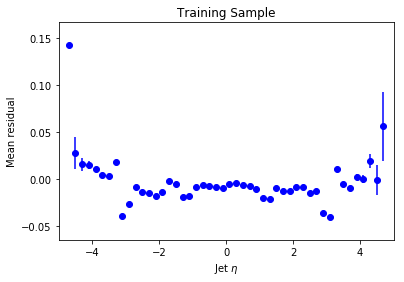

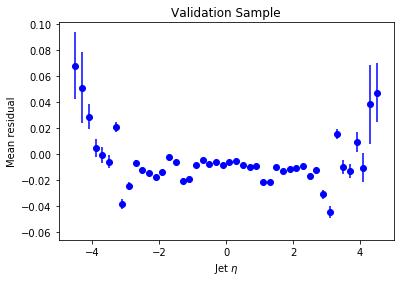

In [26]:
profile_data(df_jets_train['jet_eta'], [residual_train], 50, -5, 5, ['b'], plabels=[''], title='Training Sample', xlabel='Jet $\eta$', ylabel='Mean residual')
profile_data(df_jets_val['jet_eta'], [residual_val], 50, -5, 5, ['b'], plabels=[''], title='Validation Sample', xlabel='Jet $\eta$', ylabel='Mean residual')

#### Target as a function of pT and eta

In [27]:
# Get mean residual for each pT and eta bin
# (There is probably a more efficient way to do this, but it works)

x_eta, x_pt, w_train, w_val = [], [], [], []

pt_bins = np.logspace(np.log10(50), np.log10(3050), 100)
eta_bins = np.linspace(-5,5,10)

for ipt in range(len(pt_bins)-1):
    for ieta in range(len(eta_bins)-1):

        # Get indices of all events that fall into this pt and eta bin
        index_train = ((df_jets_train['jet_eta'] > eta_bins[ieta]) & (df_jets_train['jet_eta'] <= eta_bins[ieta+1]) 
                 & (df_jets_train['jet_pt'] > pt_bins[ipt]) & (df_jets_train['jet_pt'] <= pt_bins[ipt+1]))

        index_val = ((df_jets_val['jet_eta'] > eta_bins[ieta]) & (df_jets_val['jet_eta'] <= eta_bins[ieta+1]) 
                 & (df_jets_val['jet_pt'] > pt_bins[ipt]) & (df_jets_val['jet_pt'] <= pt_bins[ipt+1]))
        
        # Save the current pt and eta bin
        x_pt.append(pt_bins[ipt])
        x_eta.append(eta_bins[ieta])

        # Get the mean residual of the training set
        true = true_train[index_train]
        pred = pred_train[index_train][:,0]
        w_train.append(np.mean(true-pred/true))

        # Get the mean residual of the validation set
        true = true_val[index_val]
        pred = pred_val[index_val][:,0]
        w_val.append(np.mean(true-pred/true))


Bbox(x0=98.98272, y0=864.098181818, x1=116.66016, y1=597.24)
Bbox(x0=98.98272, y0=508.287272727, x1=116.66016, y1=241.429090909)


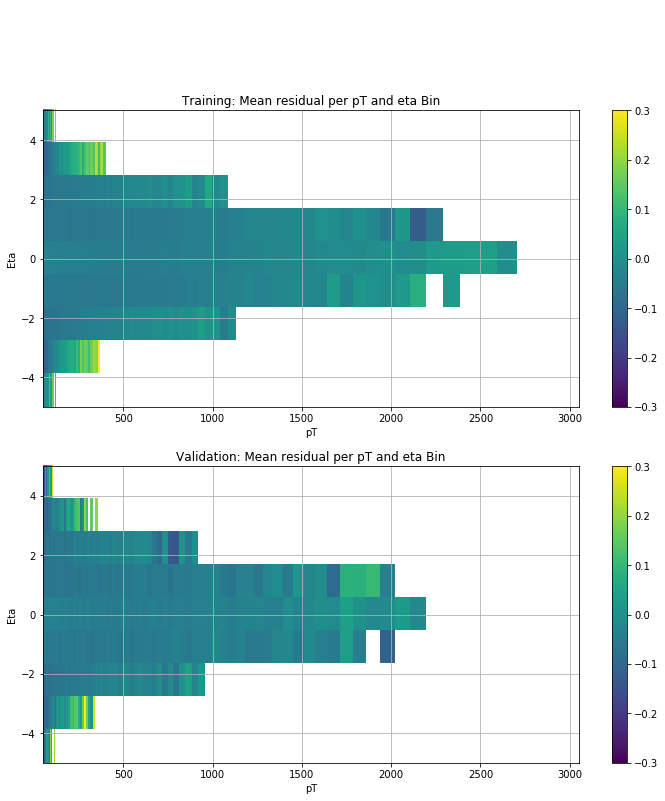

In [28]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.grid()
x = plt.hist2d(x_pt, x_eta, weights=w_train, bins=[pt_bins, eta_bins])
im = x[-1]
plt.xlabel('pT')
plt.ylabel('Eta')
plt.title('Training: Mean residual per pT and eta Bin')
plt.colorbar()
plt.clim(-0.3, 0.3)

# Workaround for issues with using variable bins with hist2D
# https://github.com/matplotlib/matplotlib/issues/8426
im.set_extent(im.get_extent())
print(im.get_window_extent())  

plt.subplot(2,1,2)
plt.grid()
x = plt.hist2d(x_pt, x_eta, weights=w_val, bins=[pt_bins, eta_bins])
im = x[-1]
plt.xlabel('pT')
plt.ylabel('Eta')
plt.title('Validation: Mean residual per pT and eta Bin')
plt.colorbar()
plt.clim(-0.3, 0.3)

# Workaround for issues with using variable bins with hist2D
# https://github.com/matplotlib/matplotlib/issues/8426
im.set_extent(im.get_extent())
print(im.get_window_extent())  

#### Target as a function of particle type fraction

##### Charged hadron fraction

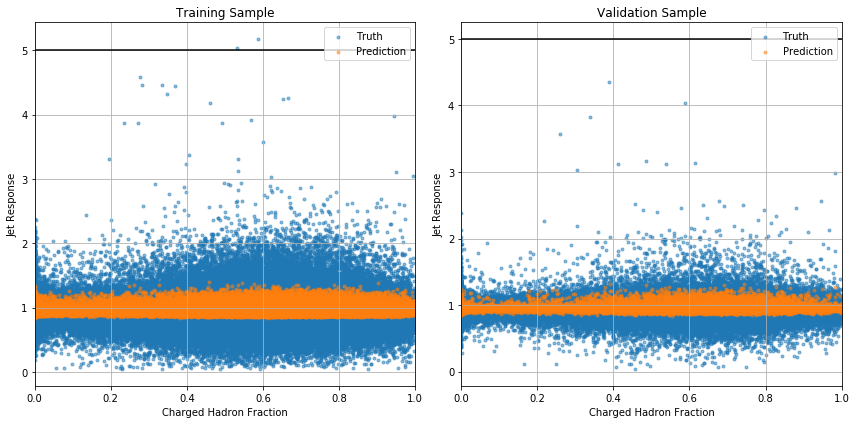

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['chf'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['chf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Charged Hadron Fraction')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['chf'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['chf'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Charged Hadron Fraction')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

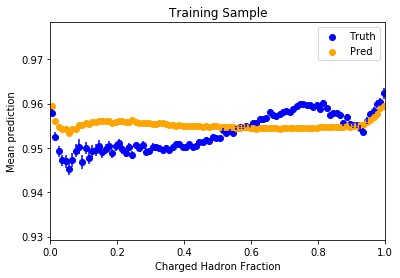

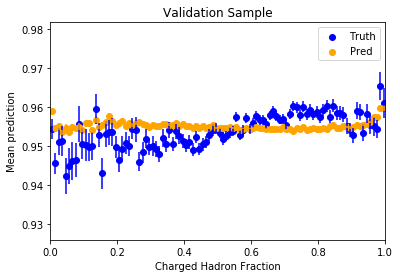

In [30]:
profile_data(df_jets_train['chf'], [true_train, pred_train], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Charged Hadron Fraction', ylabel='Mean prediction')
profile_data(df_jets_val['chf'], [true_val, pred_val], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Charged Hadron Fraction', ylabel='Mean prediction')

##### Neutral hadron fraction

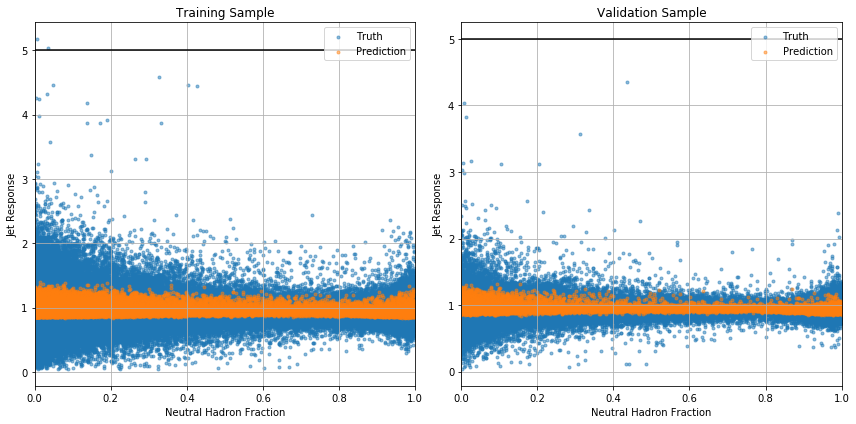

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['nhf'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['nhf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Neutral Hadron Fraction')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['nhf'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['nhf'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Neutral Hadron Fraction')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

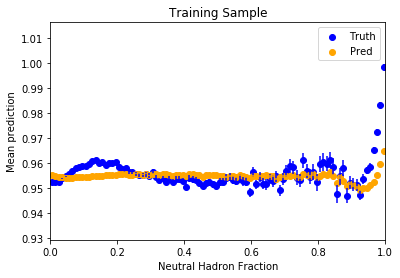

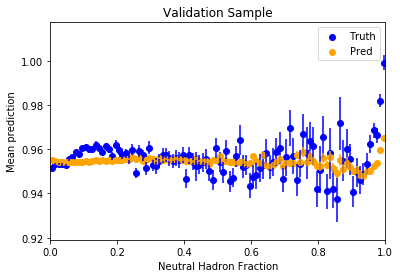

In [32]:
profile_data(df_jets_train['nhf'], [true_train, pred_train], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Neutral Hadron Fraction', ylabel='Mean prediction')
profile_data(df_jets_val['nhf'], [true_val, pred_val], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Neutral Hadron Fraction', ylabel='Mean prediction')

##### Photon fraction

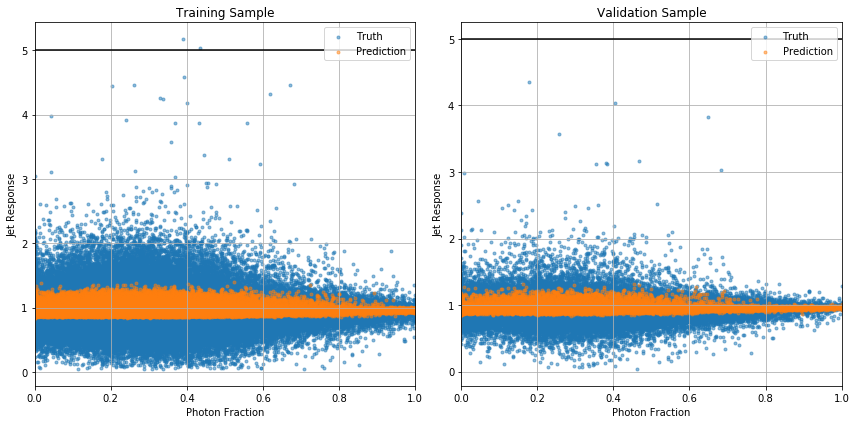

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter( df_jets_train['phf'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter( df_jets_train['phf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Photon Fraction')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter( df_jets_val['phf'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter( df_jets_val['phf'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Photon Fraction')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

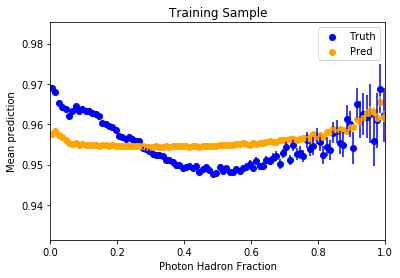

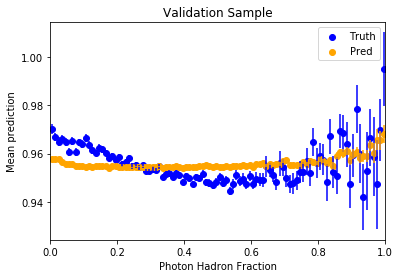

In [34]:
profile_data(df_jets_train['phf'], [true_train, pred_train], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Photon Hadron Fraction', ylabel='Mean prediction')
profile_data(df_jets_val['phf'], [true_val, pred_val], 100, 0, 1, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Photon Hadron Fraction', ylabel='Mean prediction')

##### Jet area

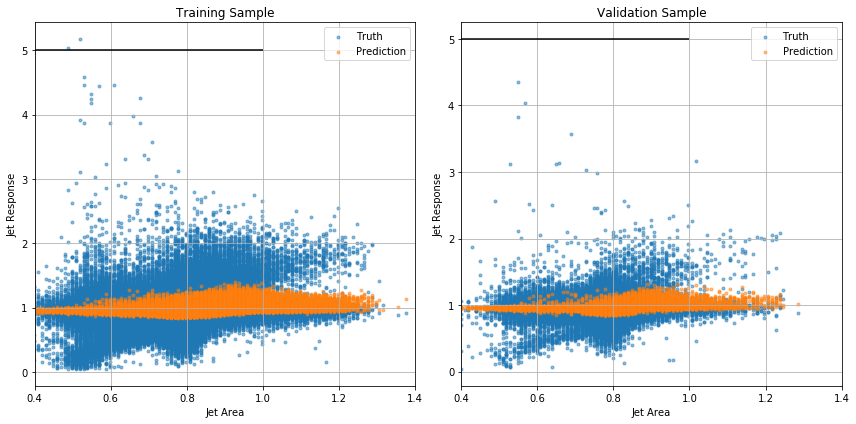

In [35]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['jet_area'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['jet_area'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0.4,1.4))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet Area')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['jet_area'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['jet_area'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0.4,1.4))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet Area')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

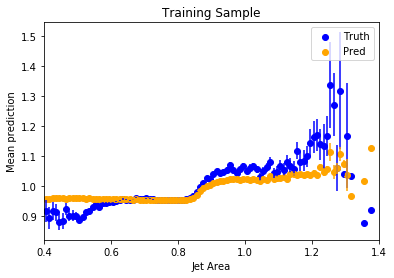

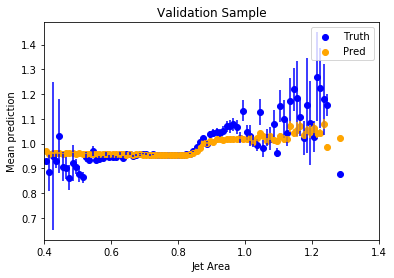

In [36]:
profile_data(df_jets_train['jet_area'], [true_train, pred_train], 100, 0.4, 1.4, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Jet Area', ylabel='Mean prediction')
profile_data(df_jets_val['jet_area'], [true_val, pred_val], 100, 0.4, 1.4, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Jet Area', ylabel='Mean prediction')

##### Charged multiplicity

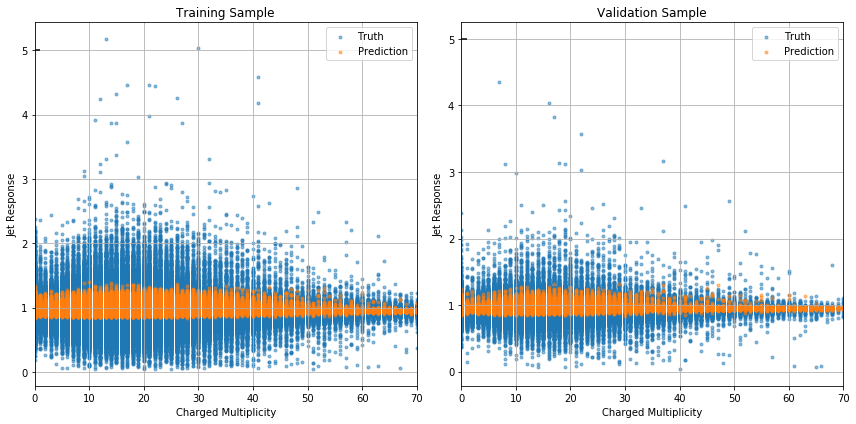

In [37]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['chm'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['chm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,70))
plt.hlines(5., -1.,1.)
plt.xlabel('Charged Multiplicity')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['chm'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['chm'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,70))
plt.hlines(5., -1.,1.)
plt.xlabel('Charged Multiplicity')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

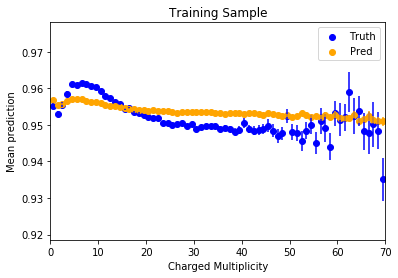

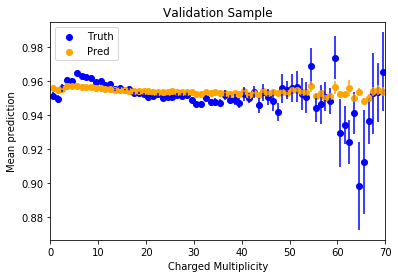

In [38]:
profile_data(df_jets_train['chm'], [true_train, pred_train], 70, 0, 70, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Charged Multiplicity', ylabel='Mean prediction')
profile_data(df_jets_val['chm'], [true_val, pred_val], 70, 0, 70, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Charged Multiplicity', ylabel='Mean prediction')

##### Neutral multiplicity

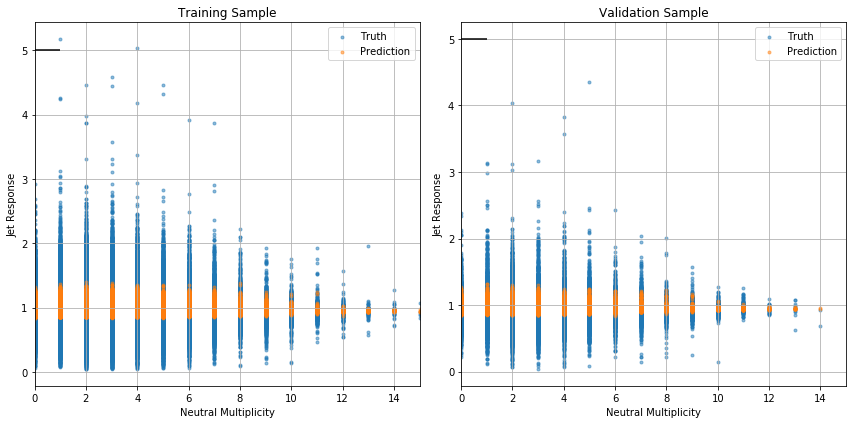

In [39]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.grid()
plt.title('Training Sample')
plt.scatter(df_jets_train['nhm'], true_train, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_train['nhm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,15))
plt.hlines(5., -1.,1.)
plt.xlabel('Neutral Multiplicity')
plt.ylabel(target_var)
plt.legend()

plt.subplot(1,2,2)
plt.grid()
plt.title('Validation Sample')
plt.scatter(df_jets_val['nhm'], true_val, label='Truth', alpha=0.5 , marker='.')
plt.scatter(df_jets_val['nhm'], pred_val, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,15))
plt.hlines(5., -1.,1.)
plt.xlabel('Neutral Multiplicity')
plt.ylabel(target_var)
plt.legend()

plt.tight_layout()
plt.show()

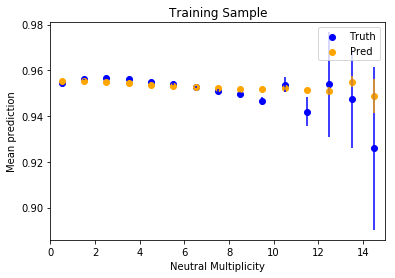

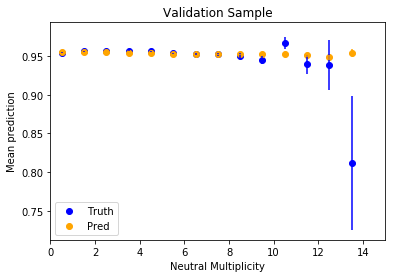

In [40]:
profile_data(df_jets_train['nhm'], [true_train, pred_train], 15, 0, 15, ['b','orange'], plabels=['Truth', 'Pred'], title='Training Sample', xlabel='Neutral Multiplicity', ylabel='Mean prediction')
profile_data(df_jets_val['nhm'], [true_val, pred_val], 15, 0, 15, ['b','orange'], plabels=['Truth', 'Pred'], title='Validation Sample', xlabel='Neutral Multiplicity', ylabel='Mean prediction')